<a href="https://colab.research.google.com/github/itsamekadio/Numerical_Methods_Course/blob/main/week5(regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Initial guess 1: a0=1.0, a1=1.0 ===
Iter 1: a0=0.728523, a1=1.501931, SSE=0.024751
Iter 2: a0=0.791043, a1=1.677701, SSE=0.024241
Iter 3: a0=0.791852, a1=1.675268, SSE=0.000663

Final results after 3 iterations:
a0 = 0.791852, a1 = 1.675268
Final SSE = 0.000663
Converged: True

=== Initial guess 2: a0=0.5, a1=0.5 ===
Iter 1: a0=-0.071223, a1=2.719460, SSE=0.826115
Iter 2: a0=0.766104, a1=15.205596, SSE=2.457977
Iter 3: a0=0.695144, a1=-78.185617, SSE=0.267071
Iter 4: a0=0.493438, a1=-77.870134, SSE=304978409529362923604866602002773683236976575386062128681523299956575698805930351074756774476502065904408401451719568383504139506375790365974481707466752.000000
Iter 5: a0=0.277559, a1=-77.620134, SSE=37156045031195509222535656029630103664822893168863792640112115031354947568821240807443958173157206598865416420426412686867733476818348382090635966939136.000000
Iter 6: a0=0.077878, a1=-77.495432, SSE=381674584933242628938136288900818827447250992709650305249140213007830652239833128004640026

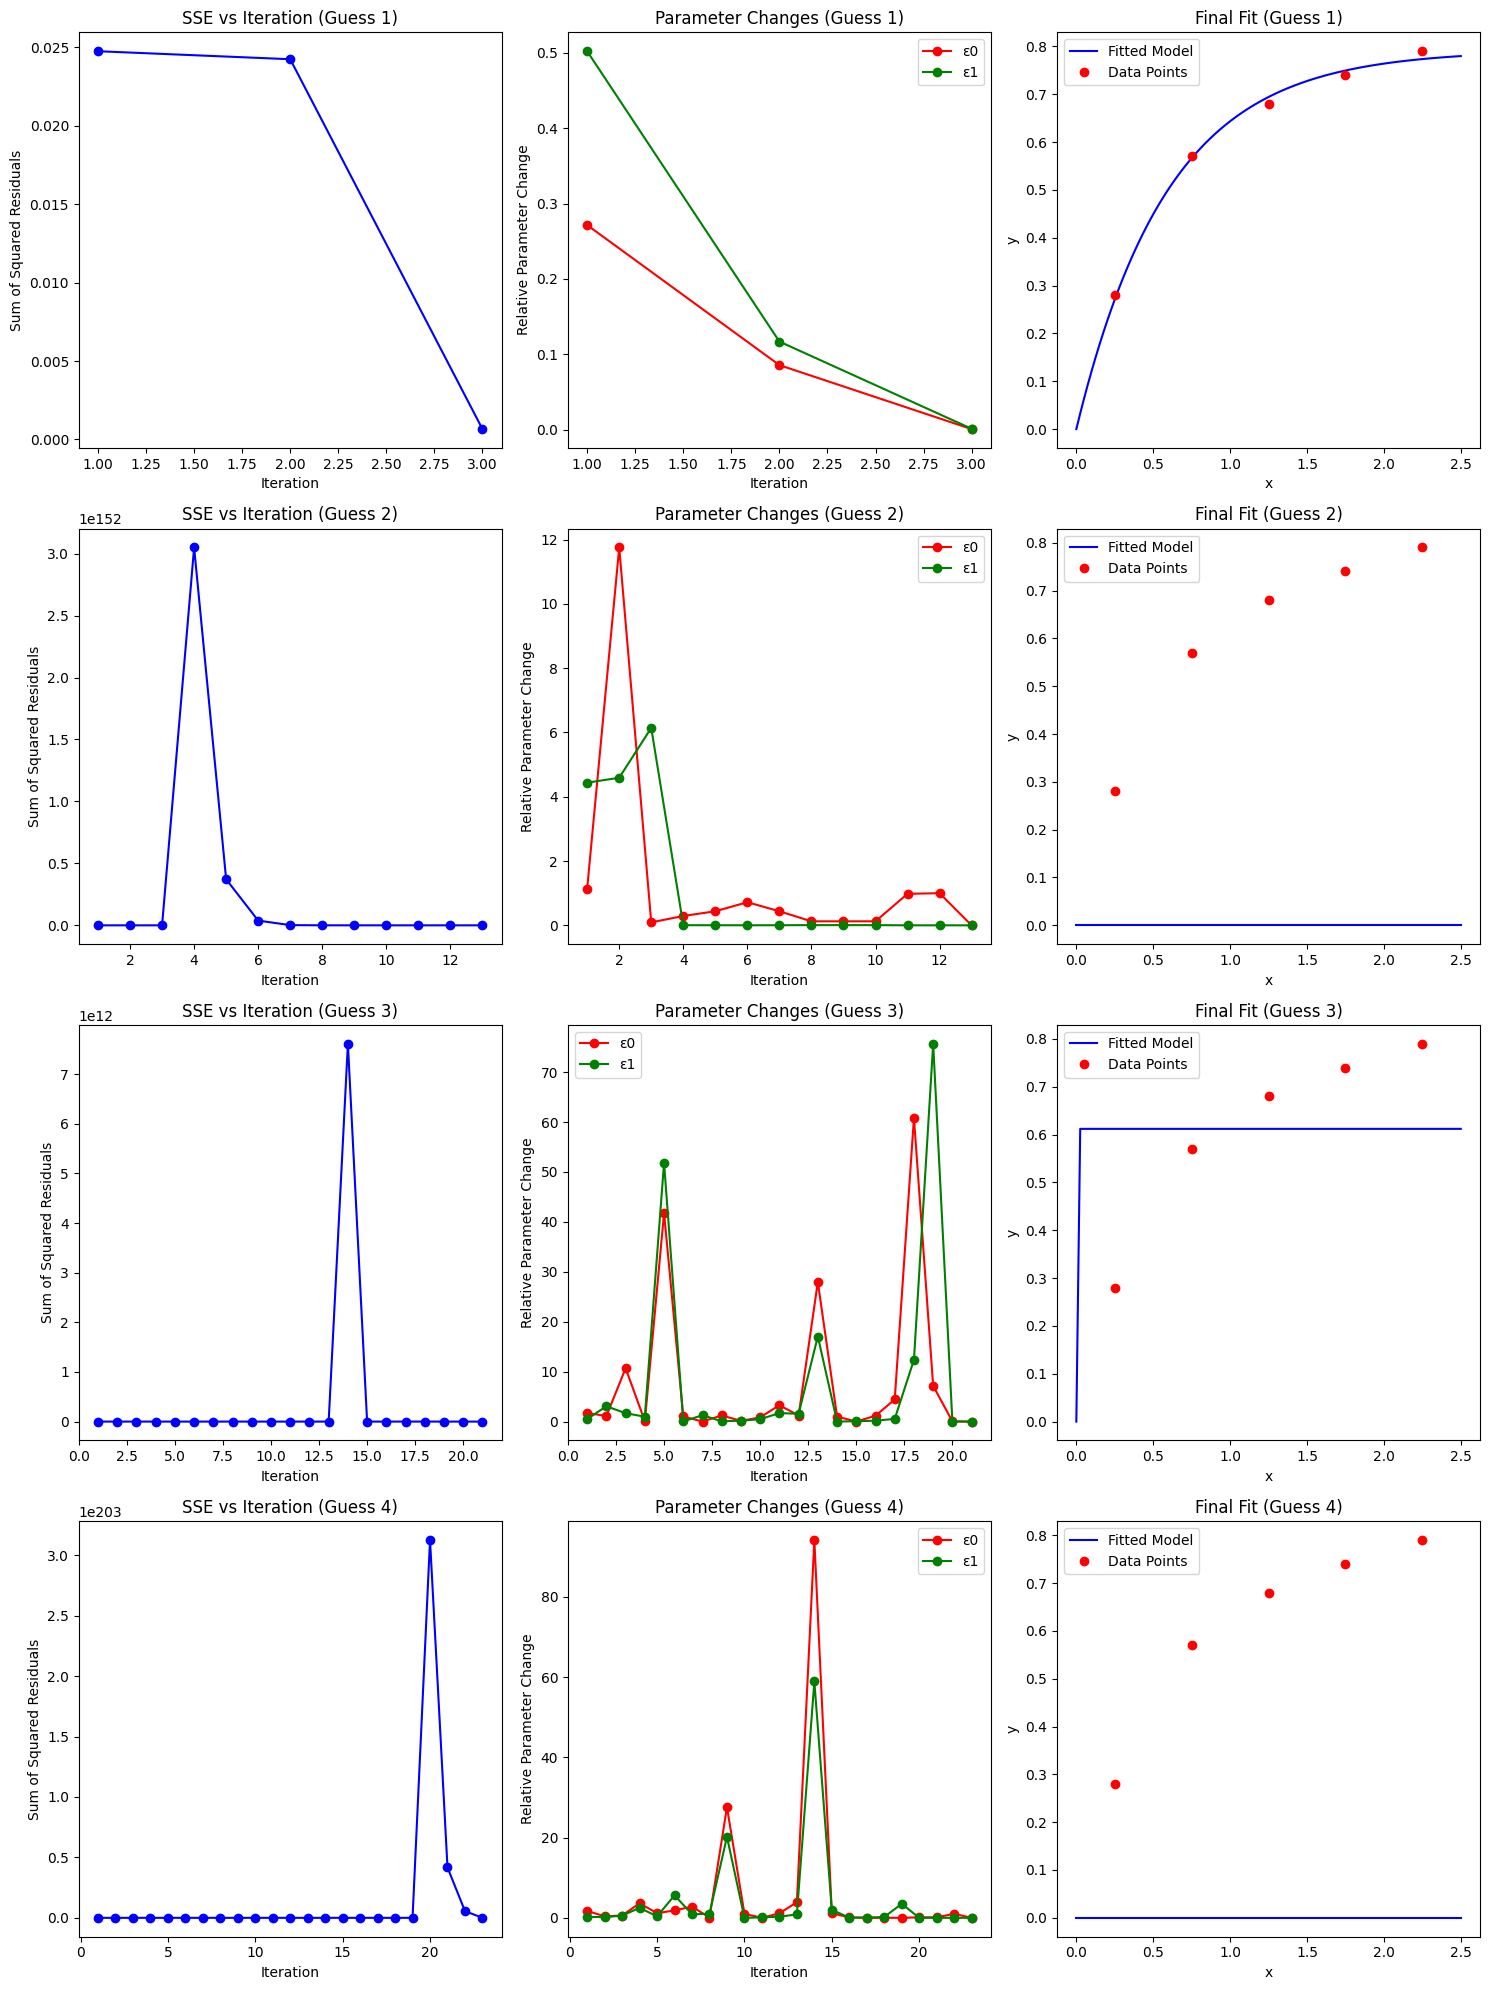

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0.25, 0.75, 1.25, 1.75, 2.25])
y_data = np.array([0.28, 0.57, 0.68, 0.74, 0.79])

def model(x, a0, a1):
    return a0 * (1 - np.exp(-a1 * x))

def partial_a0(x, a0, a1):
    return 1 - np.exp(-a1 * x)

def partial_a1(x, a0, a1):
    return a0 * x * np.exp(-a1 * x)

initial_guesses = [
    [1.0, 1.0],
    [0.5, 0.5],
    [-1.0, 1.0],
    [1.0, -1.0]
]

SSE_threshold = 1e-4
param_threshold = 0.01
max_iterations = 100
min_delta = 1e-8

plt.figure(figsize=(15, 20))

for guess_idx, (a0_init, a1_init) in enumerate(initial_guesses, 1):
    print(f"\n=== Initial guess {guess_idx}: a0={a0_init}, a1={a1_init} ===")

    a0, a1 = a0_init, a1_init
    iterations = 0
    converged = False

    a0_history = [a0]
    a1_history = [a1]
    SSE_history = []
    epsilon0_history = []
    epsilon1_history = []

    while not converged and iterations < max_iterations:
        iterations += 1

        y_pred = model(x_data, a0, a1)
        residuals = y_data - y_pred
        SSE = np.sum(residuals**2)
        SSE_history.append(SSE)

        Z = np.zeros((len(x_data), 2))
        Z[:,0] = partial_a0(x_data, a0, a1)
        Z[:,1] = partial_a1(x_data, a0, a1)

        D = residuals

        ZTZ = Z.T @ Z
        ZTZ += np.eye(2) * min_delta
        ZTD = Z.T @ D

        try:
            delta_a = np.linalg.solve(ZTZ, ZTD)
        except np.linalg.LinAlgError:
            delta_a = np.linalg.lstsq(ZTZ, ZTD, rcond=None)[0]

        delta_a0 = delta_a[0]
        delta_a1 = delta_a[1]

        if np.isnan(delta_a0) or np.isnan(delta_a1):
            delta_a0 = 0
            delta_a1 = 0

        epsilon0 = abs(delta_a0 / (a0 + min_delta))
        epsilon1 = abs(delta_a1 / (a1 + min_delta))

        epsilon0_history.append(epsilon0)
        epsilon1_history.append(epsilon1)

        a0 += delta_a0
        a1 += delta_a1
        a0_history.append(a0)
        a1_history.append(a1)

        if (SSE < SSE_threshold) or (epsilon0 < param_threshold and epsilon1 < param_threshold):
            converged = True

        print(f"Iter {iterations}: a0={a0:.6f}, a1={a1:.6f}, SSE={SSE:.6f}")

    print(f"\nFinal results after {iterations} iterations:")
    print(f"a0 = {a0:.6f}, a1 = {a1:.6f}")
    print(f"Final SSE = {SSE:.6f}")
    print(f"Converged: {converged}")

    plt.subplot(4, 3, 3*(guess_idx-1)+1)
    plt.plot(range(1, iterations+1), SSE_history, 'b-o')
    plt.xlabel('Iteration')
    plt.ylabel('Sum of Squared Residuals')
    plt.title(f'SSE vs Iteration (Guess {guess_idx})')

    plt.subplot(4, 3, 3*(guess_idx-1)+2)
    plt.plot(range(1, iterations+1), epsilon0_history, 'r-o', label='ε0')
    plt.plot(range(1, iterations+1), epsilon1_history, 'g-o', label='ε1')
    plt.xlabel('Iteration')
    plt.ylabel('Relative Parameter Change')
    plt.title(f'Parameter Changes (Guess {guess_idx})')
    plt.legend()

    plt.subplot(4, 3, 3*(guess_idx-1)+3)
    x_plot = np.linspace(0, 2.5, 100)
    y_plot = model(x_plot, a0, a1)
    plt.plot(x_plot, y_plot, 'b-', label='Fitted Model')
    plt.plot(x_data, y_data, 'ro', label='Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Final Fit (Guess {guess_idx})')
    plt.legend()

plt.tight_layout()
plt.show()